In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

print('Packages loaded.')

Packages loaded.


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_pickle('churn_data_clean.pkl')

In [4]:
print(df.shape)
df.head()

(3333, 23)


account length area code international plan voice mail plan  \
0             128       415                 no             yes   
1             107       415                 no             yes   
2             137       415                 no              no   
3              84       408                yes              no   
4              75       415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total eve minutes  total eve calls  total night minutes  total night calls  \
0              197.4               99                244.7                 91   
1              195.5              103                254.4                103   
2              121.2              110                162.6                104   
3               61.9               88                196.9                 89   
4              148.3              122                186.9                121   

   total intl minutes  total intl calls  customer service calls churn  \
0                10.0                 3                       1     0   
1                13.7                 3                       1     0   
2                12.2                 5                       0     0   
3                 6.6                 7                       2     0   
4                10.1                 3                       3     0   

   total_minutes  night_perc  eve_perc  total_calls night_owl day_only  \
0          717.2    0.341188  0.275237          303         0        1   
1          625.2    0.406910  0.312700          332         1        0   
2          539.4    0.301446  0.224694          333         0        1   
3          564.8    0.348619  0.109596          255         0        1   
4          512.0    0.365039  0.289648          359         0        0   

  traveler eve_only  
0        0        0  
1        1        0  
2        1        0  
3        0        0  
4        1        0

In [5]:
df.describe(include = 'all').transpose()

count unique  top  freq      mean        std       min  \
account length          3333    NaN  NaN   NaN   101.065    39.8221         1   
area code               3333      3  415  1655       NaN        NaN       NaN   
international plan      3333      2   no  3010       NaN        NaN       NaN   
voice mail plan         3333      2   no  2411       NaN        NaN       NaN   
number vmail messages   3333    NaN  NaN   NaN   8.09901    13.6884         0   
total day minutes       3333    NaN  NaN   NaN   179.775    54.4674         0   
total day calls         3333    NaN  NaN   NaN   100.436    20.0691         0   
total eve minutes       3333    NaN  NaN   NaN    200.98    50.7138         0   
total eve calls         3333    NaN  NaN   NaN   100.114    19.9226         0   
total night minutes     3333    NaN  NaN   NaN   200.872    50.5738      23.2   
total night calls       3333    NaN  NaN   NaN   100.108    19.5686        33   
total intl minutes      3333    NaN  NaN   NaN   10.2373    2.79184         0   
total intl calls        3333    NaN  NaN   NaN   4.47945    2.46121         0   
customer service calls  3333    NaN  NaN   NaN   1.56286    1.31549         0   
churn                   3333      2    0  2850       NaN        NaN       NaN   
total_minutes           3333    NaN  NaN   NaN   591.865    89.9543     284.3   
night_perc              3333    NaN  NaN   NaN  0.340088   0.073889  0.064177   
eve_perc                3333    NaN  NaN   NaN   0.34011  0.0740219         0   
total_calls             3333    NaN  NaN   NaN   305.137    34.4482       191   
night_owl               3333      2    0  2200       NaN        NaN       NaN   
day_only                3333      2    0  2200       NaN        NaN       NaN   
traveler                3333      2    0  2200       NaN        NaN       NaN   
eve_only                3333      2    0  2200       NaN        NaN       NaN   

                             25%       50%       75%       max  
account length                74       101       127       243  
area code                    NaN       NaN       NaN       NaN  
international plan           NaN       NaN       NaN       NaN  
voice mail plan              NaN       NaN       NaN       NaN  
number vmail messages          0         0        20        51  
total day minutes          143.7     179.4     216.4     350.8  
total day calls               87       101       114       165  
total eve minutes          166.6     201.4     235.3     363.7  
total eve calls               87       100       114       170  
total night minutes          167     201.2     235.3       395  
total night calls             87       100       113       175  
total intl minutes           8.5      10.3      12.1        20  
total intl calls               3         4         6        20  
customer service calls         1         1         2         9  
churn                        NaN       NaN       NaN       NaN  
total_minutes              531.5     593.6     652.4       885  
night_perc              0.291169  0.339629  0.389643  0.660385  
eve_perc                0.291941  0.339044  0.387396  0.647786  
total_calls                  282       305       328       416  
night_owl                    NaN       NaN       NaN       NaN  
day_only                     NaN       NaN       NaN       NaN  
traveler                     NaN       NaN       NaN       NaN  
eve_only                     NaN       NaN       NaN       NaN

(array([ 15.,   5.,  11.,  12.,  17.,  16.,  23.,  16.,  27.,  26.,  43.,
         33.,  35.,  47.,  48.,  67.,  53.,  81.,  74., 100.,  76., 110.,
         87.,  74., 137.,  99., 134.,  93., 145.,  84., 143.,  82., 122.,
         93.,  98., 125.,  78., 108.,  56.,  94.,  52.,  62.,  65.,  46.,
         33.,  48.,  42.,  28.,  24.,  20.,  24.,  14.,  20.,   8.,  15.,
         10.,   7.,   5.,   3.,   3.,   5.,   3.,   2.,   1.,   4.,   0.,
          1.,   0.,   0.,   1.]),
 array([  1.        ,   4.45714286,   7.91428571,  11.37142857,
         14.82857143,  18.28571429,  21.74285714,  25.2       ,
         28.65714286,  32.11428571,  35.57142857,  39.02857143,
         42.48571429,  45.94285714,  49.4       ,  52.85714286,
         56.31428571,  59.77142857,  63.22857143,  66.68571429,
         70.14285714,  73.6       ,  77.05714286,  80.51428571,
         83.97142857,  87.42857143,  90.88571429,  94.34285714,
         97.8       , 101.25714286, 104.71428571, 108.17142857,
        11

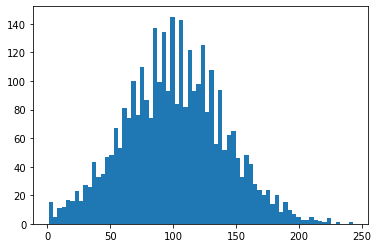

In [15]:
plt.hist(df['account length'], bins = 70)

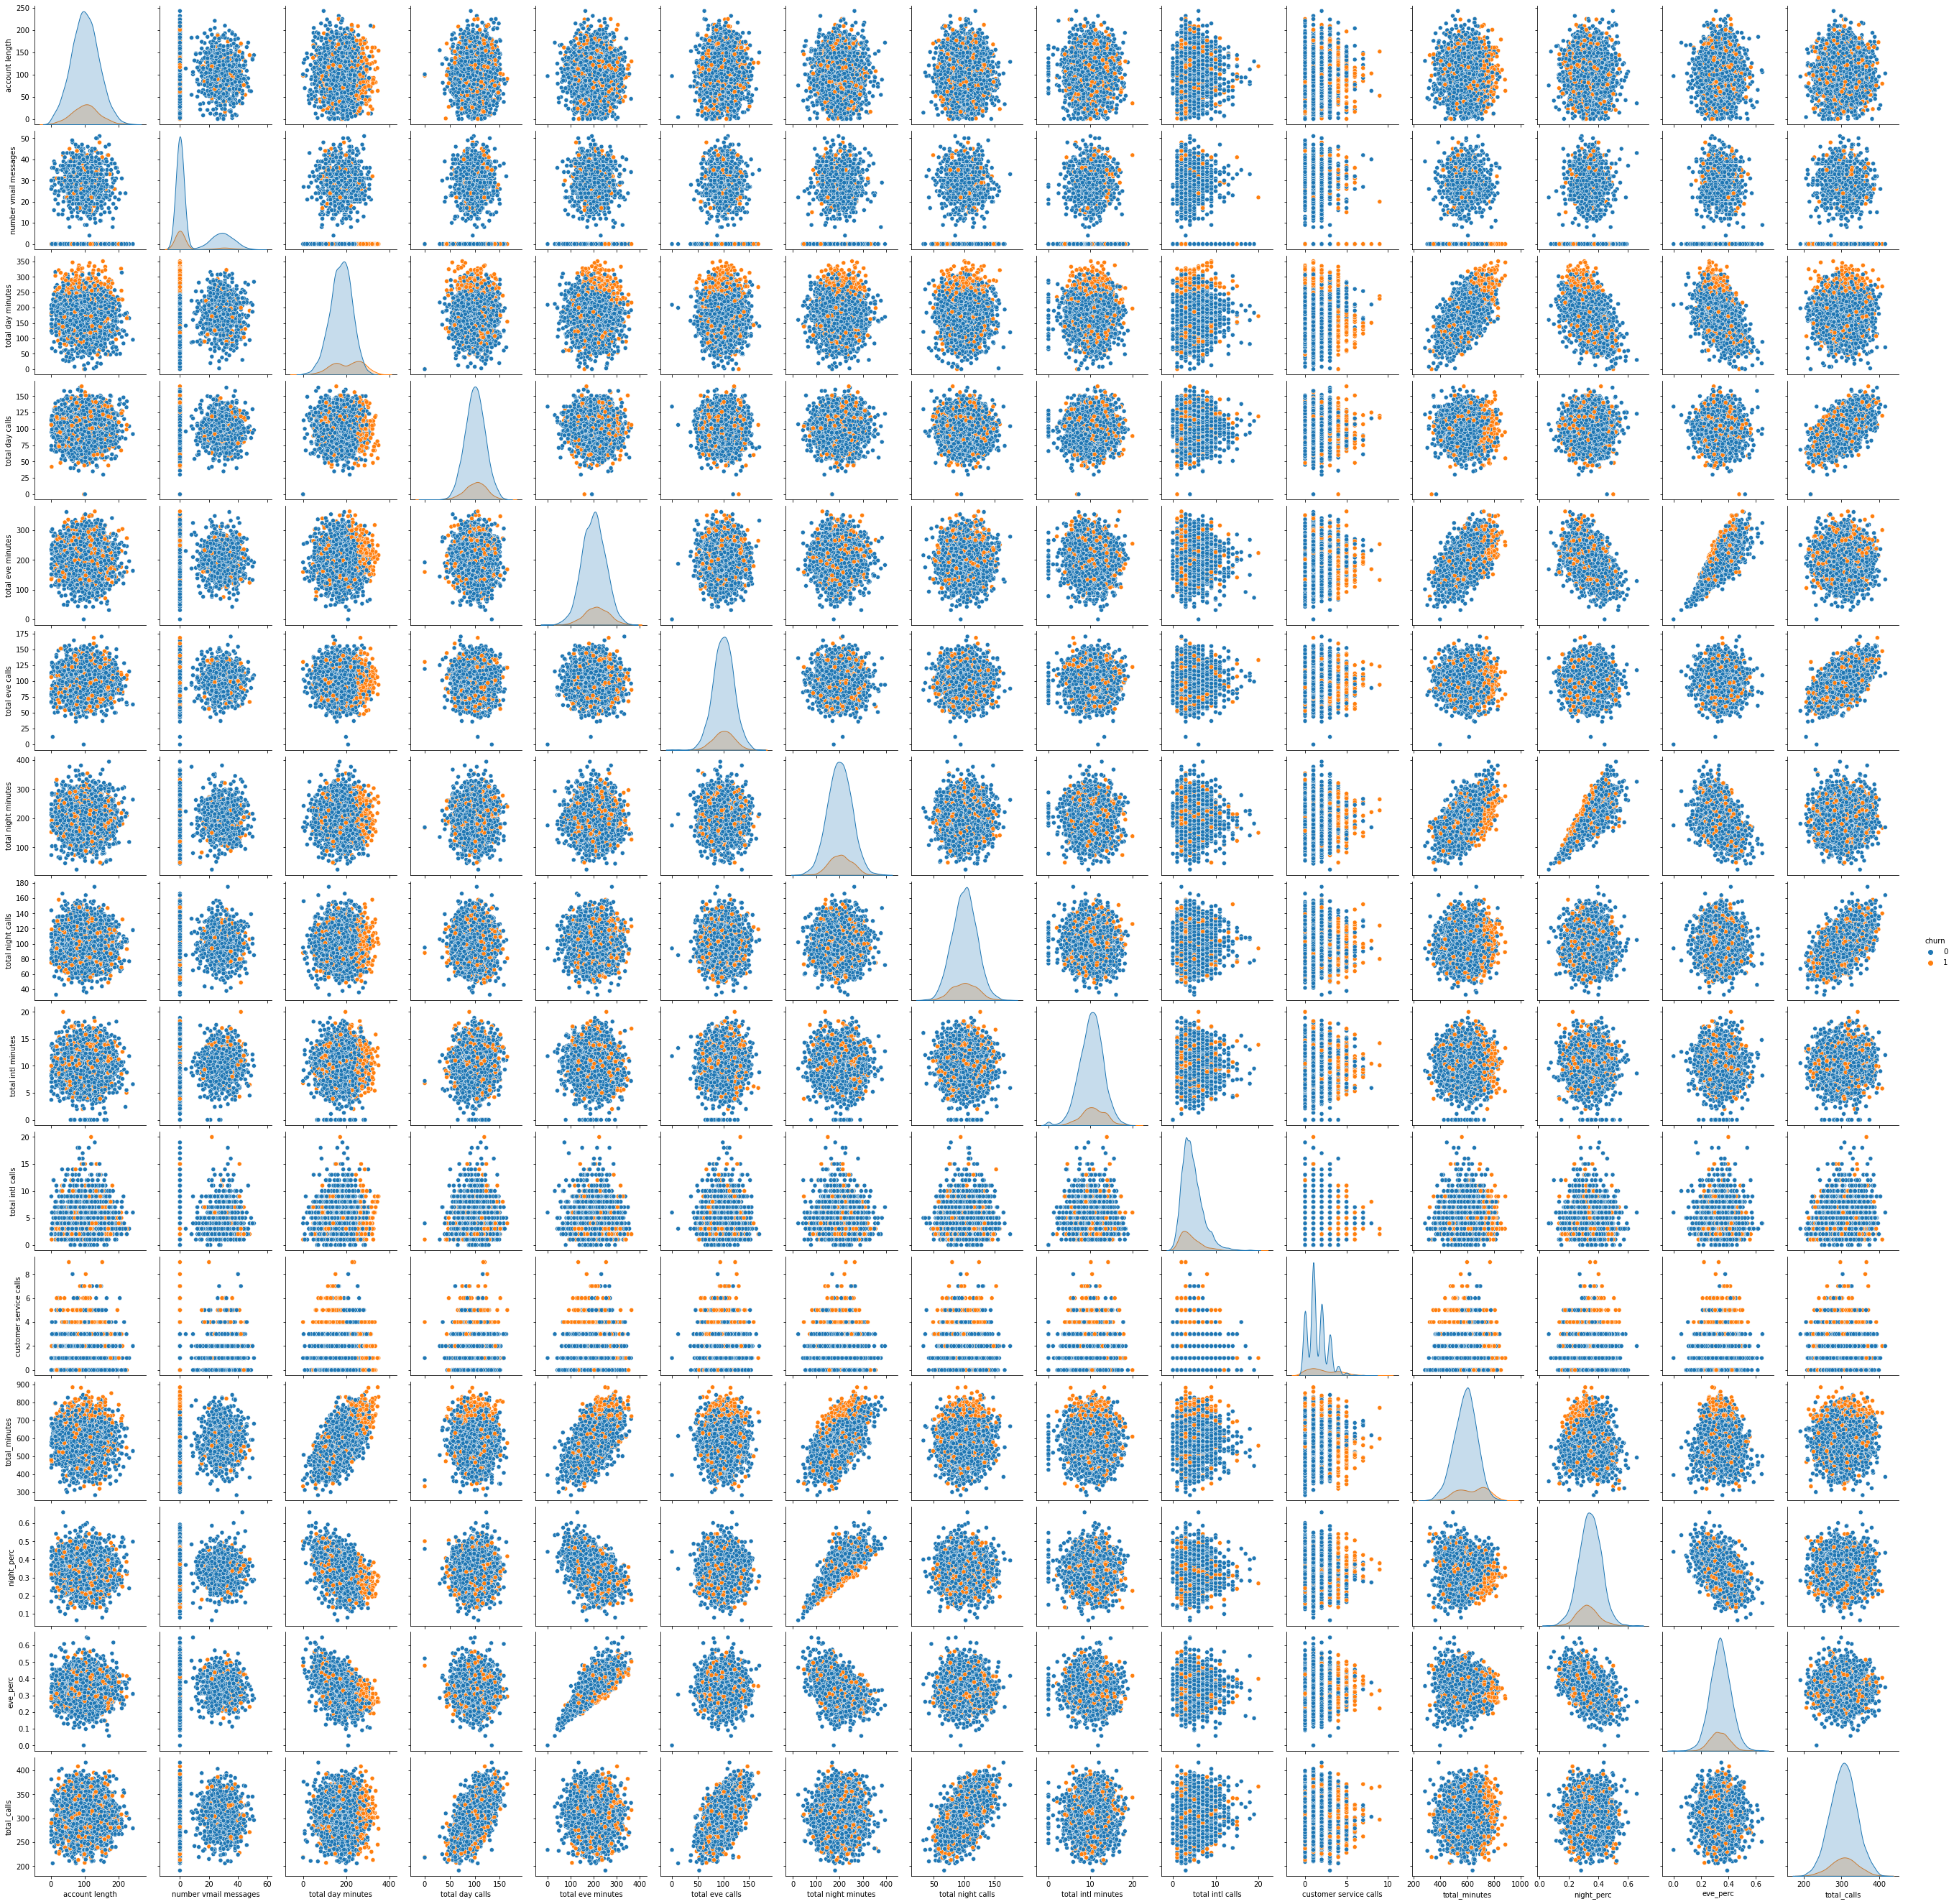

In [17]:
sb.pairplot(df, hue = 'churn')

In [7]:
features = ['account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 'total intl minutes',
       'total intl calls', 'customer service calls',
       'total_minutes', 'night_perc', 'eve_perc', 'total_calls',
       'night_owl', 'day_only', 'traveler', 'eve_only']

In [8]:
X = df[features]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8, test_size = 0.2)


In [9]:
# at this point I will standardize all of the training data and then create a pipeline for that as well

X_train.head()

cat_lst = ['area code','international plan','voice mail plan']
con_lst = [x for x in X_train.columns.values if x not in cat_lst]


In [10]:
X_train_ohe = pd.get_dummies(X_train, drop_first = True)

In [11]:
X_train_ohe

account length  number vmail messages  total day minutes  \
2342              61                      0              188.9   
1142             105                      0              106.4   
830              121                      0              167.7   
3207              93                     22              306.2   
2419              37                      0              239.9   
...              ...                    ...                ...   
2181             157                     29              219.2   
2409             183                      8               86.5   
2033             162                      0              217.6   
1364             115                      0              245.0   
451               86                     23              225.5   

      total day calls  total eve minutes  total eve calls  \
2342              105              153.6              116   
1142               71              240.1               83   
830                94               93.7              121   
3207              123              189.7               83   
2419              120              261.6               88   
...               ...                ...              ...   
2181              102              206.0              109   
2409              119              285.2               97   
2033               87              279.0               71   
1364               97              250.7               75   
451               107              246.3              105   

      total night minutes  total night calls  total intl minutes  \
2342                213.3                106                10.2   
1142                147.7                114                 5.3   
830                 241.3                115                13.4   
3207                240.3                107                11.7   
2419                207.1                 88                 8.9   
...                   ...                ...                 ...   
2181                192.4                117                15.0   
2409                180.4                133                 8.7   
2033                250.7                 65                10.4   
1364                270.2                124                13.7   
451                 245.7                 81                 9.8   

      total intl calls  customer service calls  total_minutes  night_perc  \
2342                 2                       2          566.0    0.376855   
1142                 4                       6          499.5    0.295696   
830                  1                       3          516.1    0.467545   
3207                 2                       0          747.9    0.321300   
2419                 4                       2          717.5    0.288641   
...                ...                     ...            ...         ...   
2181                 5                       1          632.6    0.304142   
2409                 2                       2          560.8    0.321683   
2033                 4                       2          757.7    0.330870   
1364                 8                       1          779.6    0.346588   
451                  2                       0          727.3    0.337825   

      eve_perc  total_calls  area code_415  area code_510  \
2342  0.271378          329              1              0   
1142  0.480681          272              1              0   
830   0.181554          331              0              0   
3207  0.253644          315              0              0   
2419  0.364599          300              0              1   
...        ...          ...            ...            ...   
2181  0.325640          333              0              1   
2409  0.508559          351              1              0   
2033  0.368220          227              0              0   
1364  0.321575          304              1              0   
451   0.338650          295              0              0   

     

In [12]:
y_train.value_counts()

0    2282
1     384
Name: churn, dtype: int64

## Class Weights

In [ ]:
class_weight = {1: 0.75,
                0: 0.25}

In [ ]:
from sklearn.metrics import f1_score, balanced_accuracy_score, plot_confusion_matrix, classification_report